<a href="https://colab.research.google.com/github/abhijeetrajhansgithub/GoogleColab/blob/main/Neural_Network_Classification_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Classification with TensorFlow

A Classification is where we try to classify something as one thing or another. There are three types of classification:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
# Check out the features

X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Let's visualize it

import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


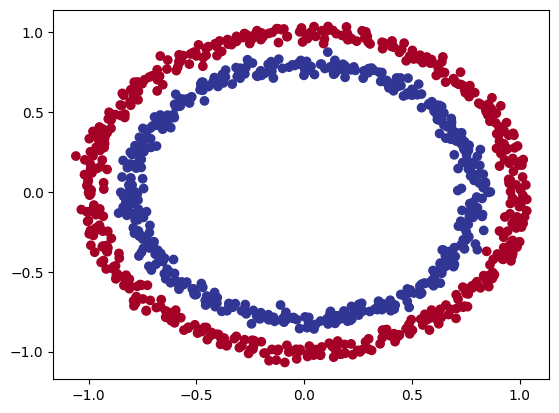

In [ ]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [ ]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How ma samples?

len(X), len(y)

(1000, 1000)

In [ ]:
# View the first sample of features and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 7ms/step - loss: 4.3528 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 4.3405 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.3370 - accuracy: 0.4720
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 4.3240 - accuracy: 0.4720
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 4.3187 - accuracy: 0.4710


In [ ]:
# Let's try to improve our model by training it for longer

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4990


[0.697721004486084, 0.49900001287460327]

Since we are working on a binary clzassification problem and our model is getting aroung -50% accuracy... it's performing as if it's guessing

In [ ]:
# Add an extra layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_2.fit(X, y, epochs=500, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5700


[0.69316565990448, 0.5699999928474426]

In [ ]:
# Improve our model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5140


[0.6948161721229553, 0.5139999985694885]

In [ ]:
# Improve the model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

model_4.fit(X, y, epochs=500, verbose=0)
model_4.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [ ]:
model_1.summary(), model_2.summary(), model_3.summary(), model_4.summary

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 10)                30        
                                                                 
 dense_54 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
____________________________

(None,
 None,
 None,
 <bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7c6666114850>>)

In [ ]:
model_1.predict(X)

32/32 [==============================] - 0s 4ms/step


array([[0.43642348],
       [0.5490796 ],
       [0.5534621 ],
       [0.5212462 ],
       [0.4614077 ],
       [0.5276728 ],
       [0.4927575 ],
       [0.43526572],
       [0.50681216],
       [0.50045663],
       [0.541683  ],
       [0.44924763],
       [0.5004696 ],
       [0.4387929 ],
       [0.4491175 ],
       [0.47997707],
       [0.56331384],
       [0.48621902],
       [0.55414724],
       [0.54196346],
       [0.44558093],
       [0.5335577 ],
       [0.4960929 ],
       [0.4374299 ],
       [0.5600034 ],
       [0.56248206],
       [0.47011444],
       [0.43164974],
       [0.47527927],
       [0.44466978],
       [0.517824  ],
       [0.50813776],
       [0.49114186],
       [0.41807443],
       [0.5012879 ],
       [0.55067354],
       [0.5344338 ],
       [0.45852542],
       [0.47450623],
       [0.43648082],
       [0.53865606],
       [0.46456835],
       [0.54723686],
       [0.43121994],
       [0.5560081 ],
       [0.5613804 ],
       [0.45775607],
       [0.474

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values to make the predictions on

    x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2D arrays together

    y_pred = model.predict(x_in)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions

        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


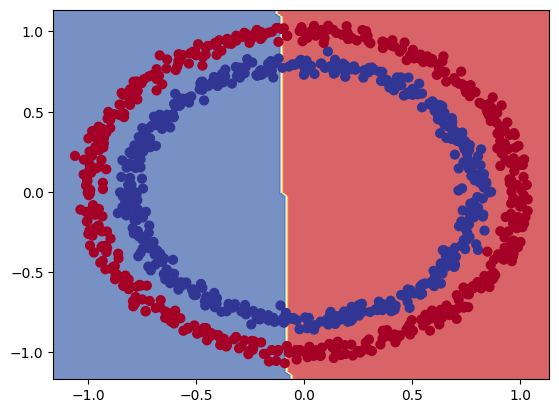

In [ ]:
# Check out the predictions
plot_decision_boundary(model=model_1, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


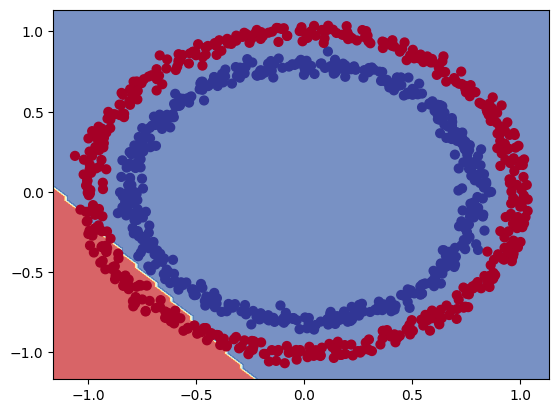

In [ ]:
plot_decision_boundary(model=model_2, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


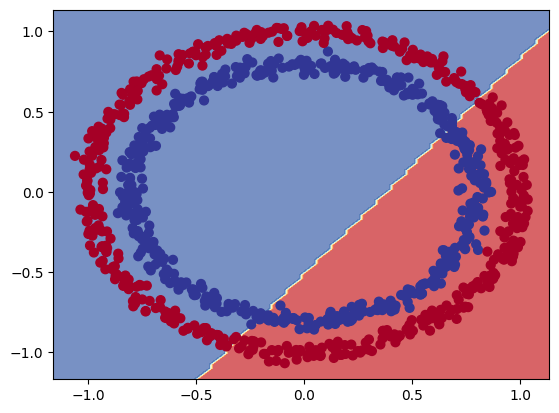

In [ ]:
plot_decision_boundary(model=model_3, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


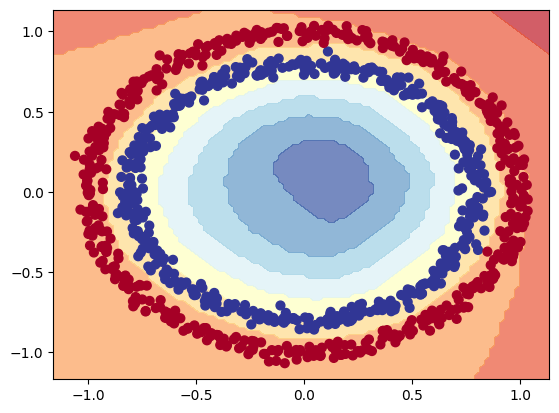

In [ ]:
plot_decision_boundary(model=model_4, X=X, y=y)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5)  # y = X + 100

X_reg, y_reg

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
# Split our regression data into training and test sets

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

if X_reg_train.ndim == 1:
    X_reg_train = tf.reshape(X_reg_train, shape=(-1, 1))

# Create, compile and fit our model to the regression data
model_reg_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_reg_1.compile(loss=tf.keras.losses.mae,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae"])

model_reg_1.fit(X_reg_train, y_reg_train, epochs=500, verbose=0)

In [ ]:
X_reg_test = tf.reshape(X_reg_test, shape=(-1, 1))

predictions = model_reg_1.predict(X_reg_test)
predictions

2/2 [==============================] - 0s 6ms/step


array([[ 815.0635 ],
       [ 819.83514],
       [ 824.6065 ],
       [ 829.3779 ],
       [ 834.14954],
       [ 838.92096],
       [ 843.6923 ],
       [ 848.4639 ],
       [ 853.23553],
       [ 858.007  ],
       [ 862.7787 ],
       [ 867.5499 ],
       [ 872.32166],
       [ 877.0932 ],
       [ 881.86456],
       [ 886.6362 ],
       [ 891.4076 ],
       [ 896.17914],
       [ 900.95074],
       [ 905.7223 ],
       [ 910.49365],
       [ 915.2652 ],
       [ 920.0368 ],
       [ 924.8082 ],
       [ 929.57983],
       [ 934.3513 ],
       [ 939.1228 ],
       [ 943.8945 ],
       [ 948.66583],
       [ 953.43726],
       [ 958.2088 ],
       [ 962.98047],
       [ 967.75195],
       [ 972.5234 ],
       [ 977.2949 ],
       [ 982.06647],
       [ 986.8381 ],
       [ 991.60944],
       [ 996.38104],
       [1001.1524 ],
       [1005.924  ],
       [1010.6956 ],
       [1015.46716],
       [1020.23846],
       [1025.0103 ],
       [1029.7816 ],
       [1034.5531 ],
       [1039.

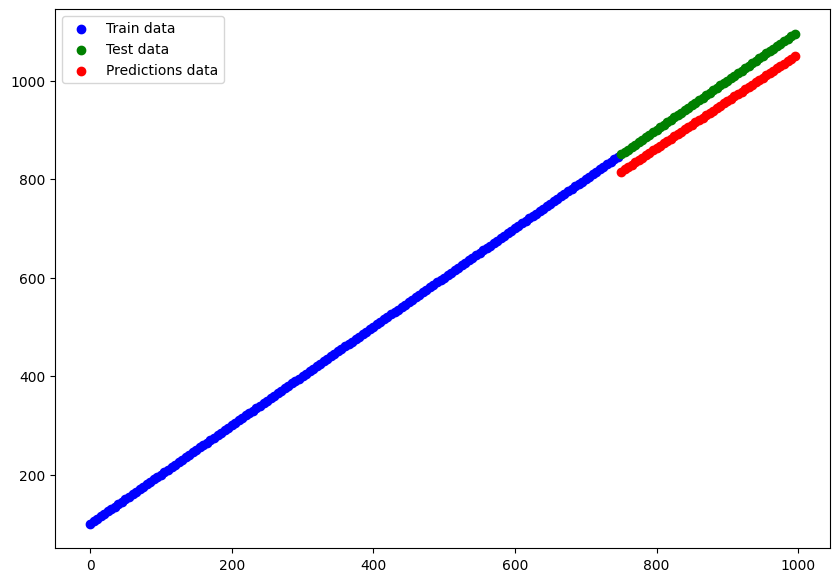

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="blue", label="Train data")
plt.scatter(X_reg_test, y_reg_test, c="green", label="Test data")
plt.scatter(X_reg_test, predictions, c="red", label="Predictions data")
plt.legend()

## Non-Linearity

In [ ]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                metrics=[tf.keras.metrics.Accuracy()])

# Fit the model
history_5 = model_5.fit(X, y, epochs=1500, verbose=0)

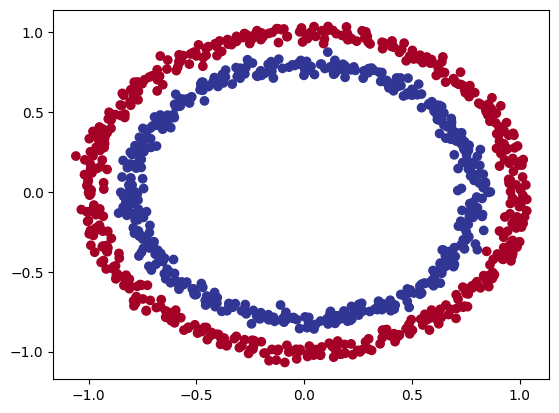

In [ ]:
# Check out our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


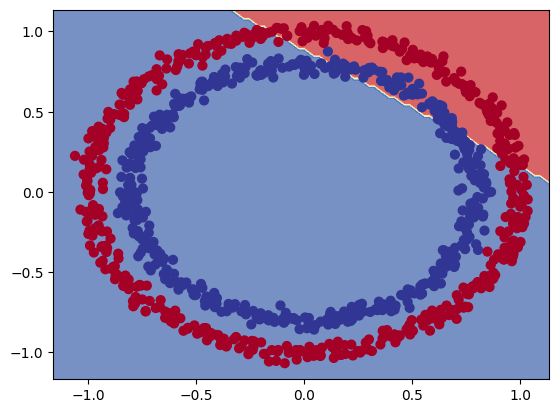

In [ ]:
# Check the decision boundary for our latest model

plot_decision_boundary(model=model_5, X=X, y=y)

### Model 6

313/313 [==============================] - 0s 1ms/step
Doing binary classification


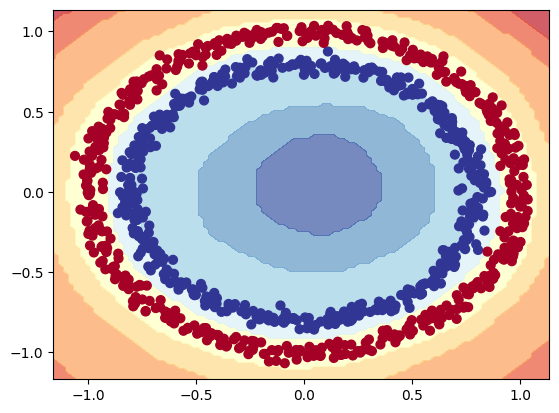

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=[tf.keras.metrics.Accuracy()])

model_6.fit(X, y, epochs=500, verbose=0)
plot_decision_boundary(model=model_6, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


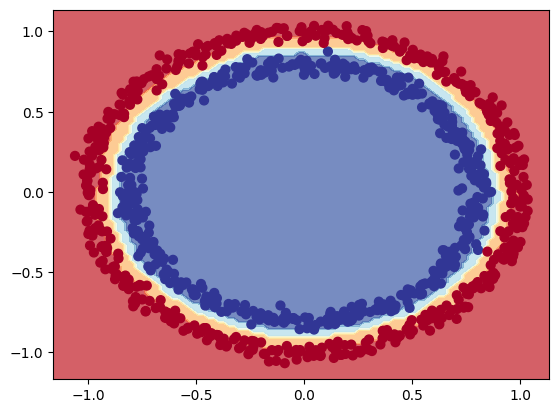

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(25, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

model_7.fit(X, y, epochs=800, verbose=0)

plot_decision_boundary(model_7, X=X, y=y)


Let's again try to build a neural network with a non-linear activation function

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_8 = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3224 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3193 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3027 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2983 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2974 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2961 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2944 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2937 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2930 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2922 - accuracy: 0.4870
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)

history_9 = model_9.fit(X, y, epochs=450)

Epoch 1/450
32/32 [==============================] - 1s 3ms/step - loss: 5.6978 - accuracy: 0.5000
Epoch 2/450
32/32 [==============================] - 0s 2ms/step - loss: 4.7402 - accuracy: 0.5000
Epoch 3/450
32/32 [==============================] - 0s 2ms/step - loss: 4.1688 - accuracy: 0.5000
Epoch 4/450
32/32 [==============================] - 0s 3ms/step - loss: 2.9401 - accuracy: 0.5000
Epoch 5/450
32/32 [==============================] - 0s 2ms/step - loss: 1.5864 - accuracy: 0.4980
Epoch 6/450
32/32 [==============================] - 0s 2ms/step - loss: 1.0078 - accuracy: 0.4840
Epoch 7/450
32/32 [==============================] - 0s 2ms/step - loss: 0.9559 - accuracy: 0.4630
Epoch 8/450
32/32 [==============================] - 0s 2ms/step - loss: 0.9209 - accuracy: 0.4670
Epoch 9/450
32/32 [==============================] - 0s 2ms/step - loss: 0.8937 - accuracy: 0.4720
Epoch 10/450
32/32 [==============================] - 0s 2ms/step - loss: 0.8706 - accuracy: 0.4760
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Doing binary classification


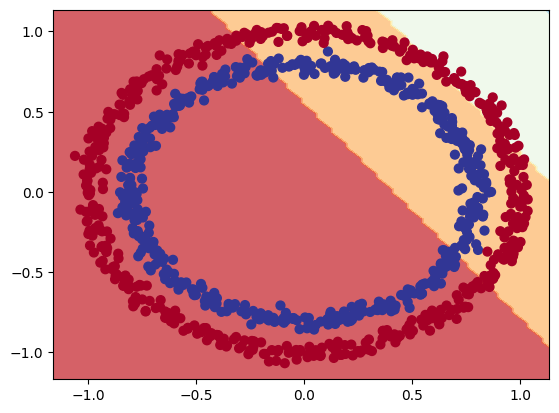

In [ ]:
plot_decision_boundary(model_8, X, y)

313/313 [==============================] - 1s 3ms/step
Doing binary classification


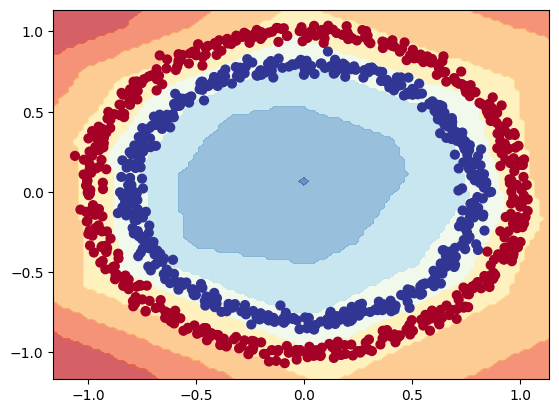

In [ ]:
plot_decision_boundary(model_9, X, y)

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_10 = model_10.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7620 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7364 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.4580
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7072 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7031 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7005 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6978 - accuracy: 0.4780
Epoch 11/

In [ ]:
# Evaluate X and y
model_10.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6970


[0.5814746618270874, 0.6970000267028809]

313/313 [==============================] - 1s 2ms/step
Doing binary classification


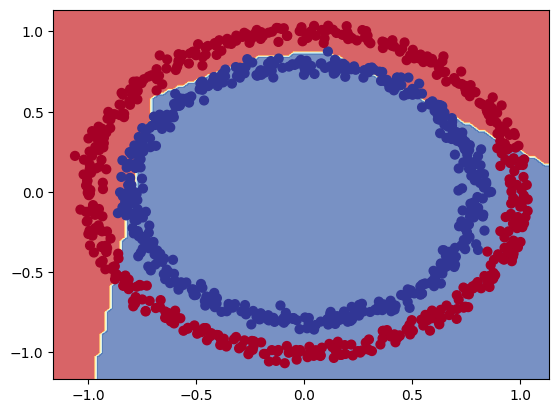

In [ ]:
plot_decision_boundary(model_10, X, y)

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

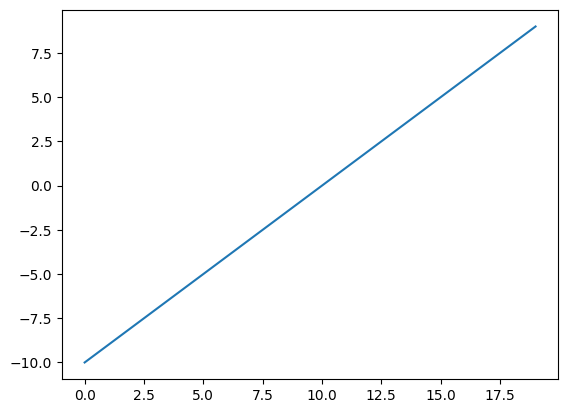

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on out toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

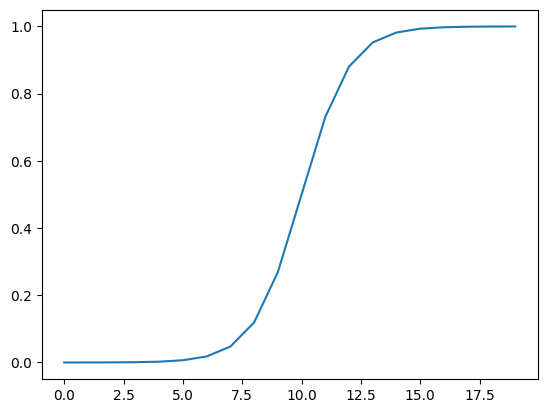

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Replicating ReLU - R(z) = max(0, z)

def relu(x):
    return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

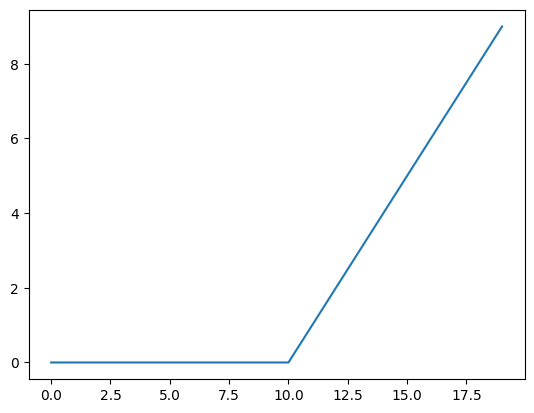

In [ ]:
plt.plot(relu(A))

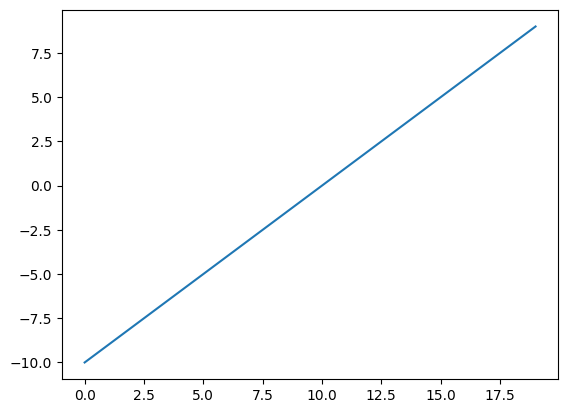

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [ ]:
print(len(X), len(y))

1000 1000


In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)

# Create the model

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

history_11 = model_11.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6949 - accuracy: 0.4863
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5288
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5350
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.6737
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6338
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6341 - accuracy: 0.6950
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5934 - accuracy: 0.8425
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.8825
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.9362
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3903 - accuracy: 0.9688
Epoch 11/50
25/25 [

In [ ]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9950


[0.027883000671863556, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


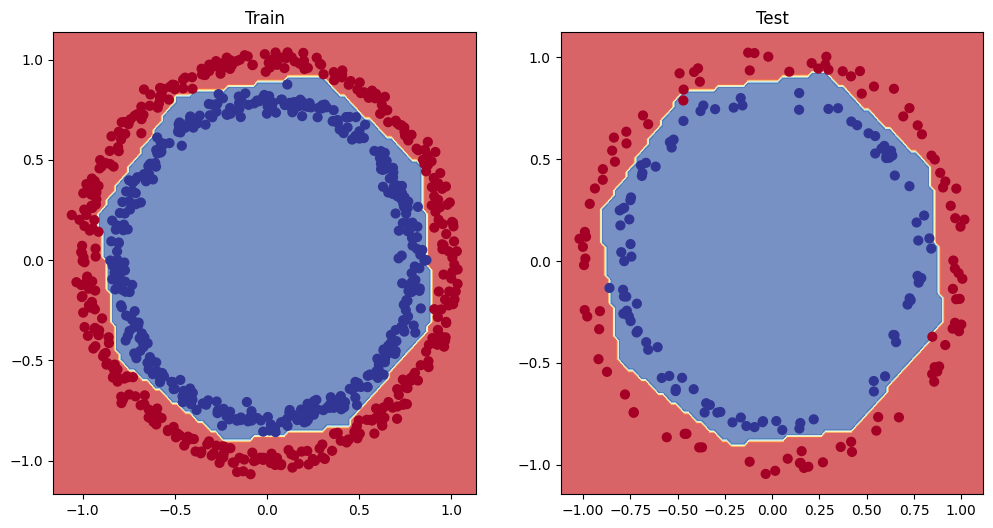

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_11, X_test, y_test)

### Plot the model's loss (or training) curves

In [ ]:
# Convert history object to a DataFrame

df = pd.DataFrame(history_11.history)
df

,loss,accuracy
0,0.694890,0.48625
1,0.688436,0.52875
2,0.681412,0.53500
3,0.671169,0.67375
4,0.657496,0.63375
5,0.634055,0.69500
6,0.593365,0.84250
7,0.548821,0.88250
8,0.476660,0.93625
9,0.390252,0.96875


Text(0.5, 1.0, 'Model_11 Loss Curves')

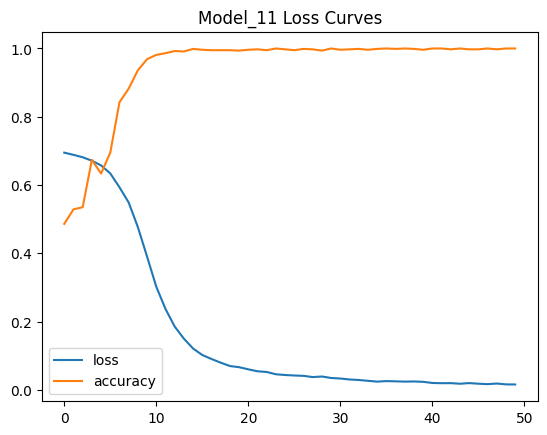

In [ ]:
# Plot the loss curves
df.plot()
plt.title("Model_11 Loss Curves")

## Finding the best learning rate

To find the ideal learning rate ( the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model *while* its training.

* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

# Create a model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_12.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_12 = model_12.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6992 - accuracy: 0.5075 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5113 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.5138 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.5175 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5150 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6970 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

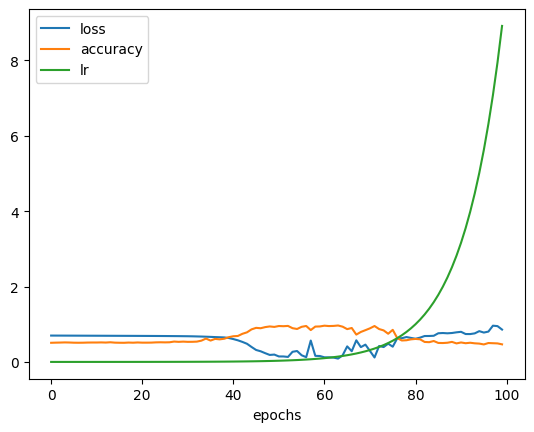

In [ ]:
pd.DataFrame(history_12.history).plot(xlabel="epochs")

In [ ]:
# Plot the learning rate vs the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

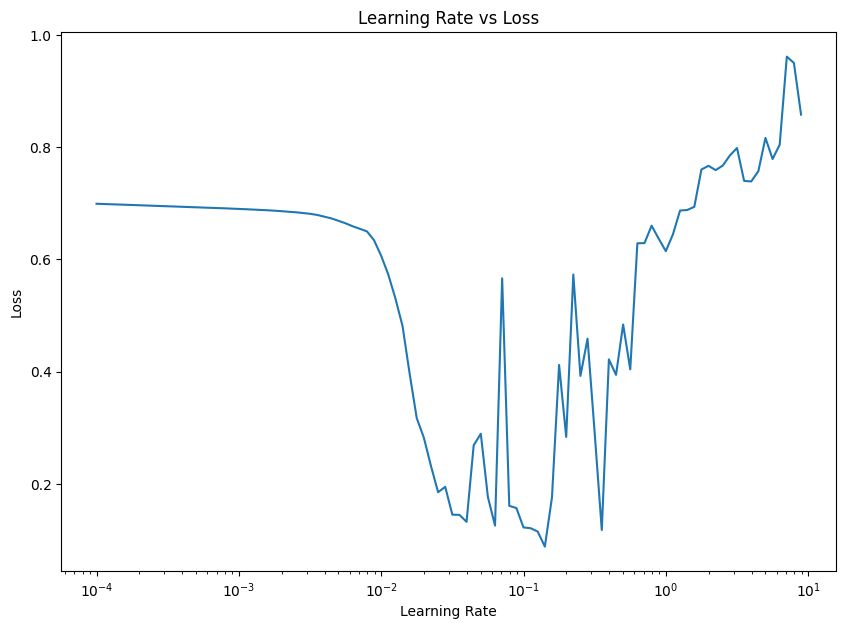

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Try using a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_13.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs
history_13 = model_13.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6956 - accuracy: 0.4800
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4837
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6859 - accuracy: 0.5350
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5400
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6578 - accuracy: 0.5950
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7188
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7400
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7912
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8125
Epoch 11/50
25/25 [

<Axes: >

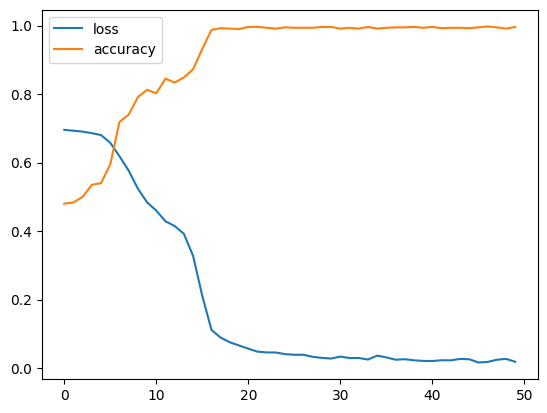

In [ ]:
pd.DataFrame(history_13.history).plot()

In [ ]:
model_13.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 1.0000


[0.015287223272025585, 1.0]

313/313 [==============================] - 1s 3ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


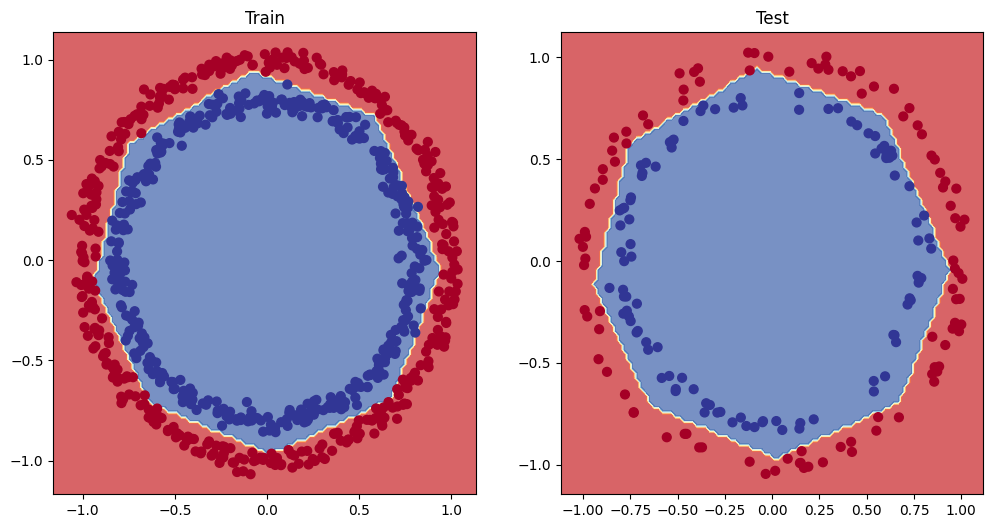

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_13, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_13, X_test, y_test)
plt.show()

## More Classification Evaluations Methods

Other evaluation methods:
* Accuracy
* Precision
* Recall
* F1-score
* Cofusion Matrix
* Classification Report (Scikit-learn)

In [ ]:
loss, accuracy = model_13.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 1.0000
Model loss on the test set: 0.015287223272025585
Model accuracy on the test set: 100.00%


### How about a confusion matrix?

In [ ]:
y_test[: 10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_13.predict(X_test)

# Convert the prediction probabilities into binary format
y_preds = tf.round(y_preds)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


array([[101,   0],
       [  0,  99]])

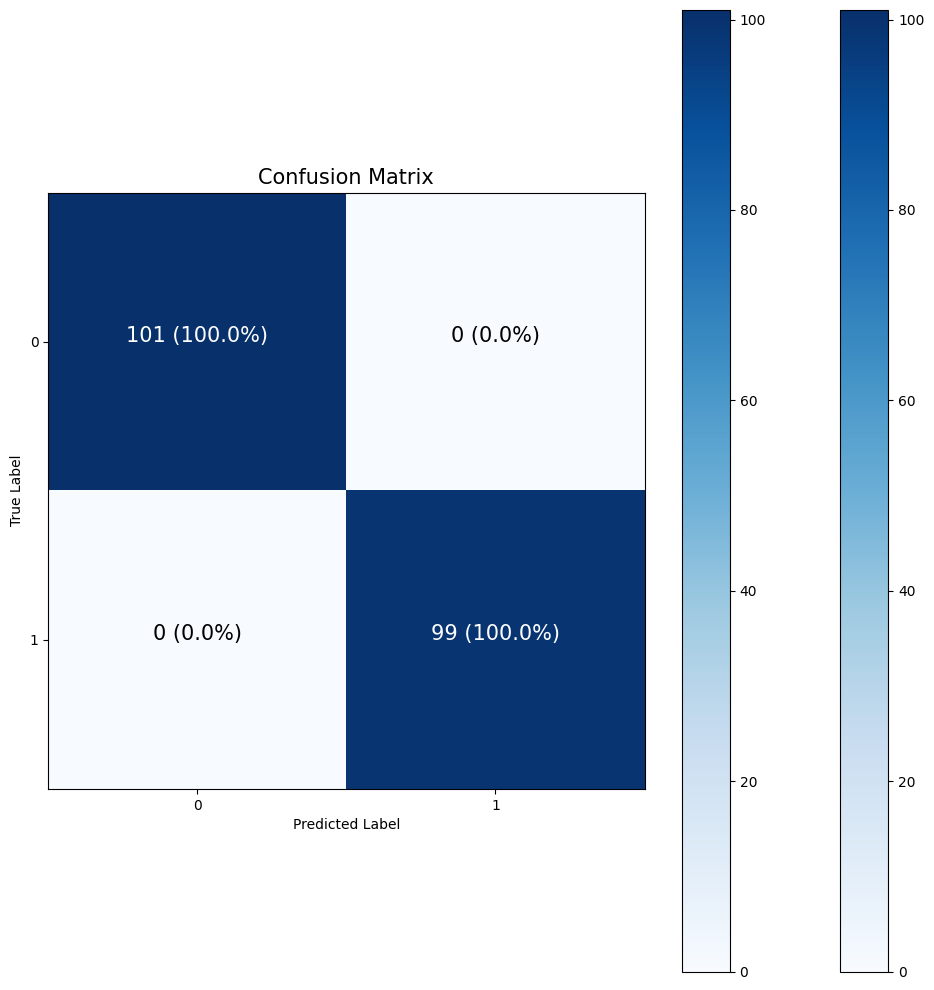

In [ ]:
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
fig.colorbar(im)

# Create classes
classes = False
if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Create title and axis labels
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels,
       yticklabels=labels)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Write the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > cm.max() / 2. else "black",
             size=15)

# Plot the figure and make it pretty
plt.title("Confusion Matrix", size=15)
plt.tight_layout()
plt.colorbar(im)


In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    import itertools

    figsize = (10, 10)

    cm = confusion_matrix(y_test, y_preds)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    fig.colorbar(im)

    # Create classes
    classes = False
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Create title and axis labels
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Write the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black",
                size=15)

    # Plot the figure and make it pretty
    plt.title("Confusion Matrix", size=15)
    plt.tight_layout()
    plt.colorbar(im)


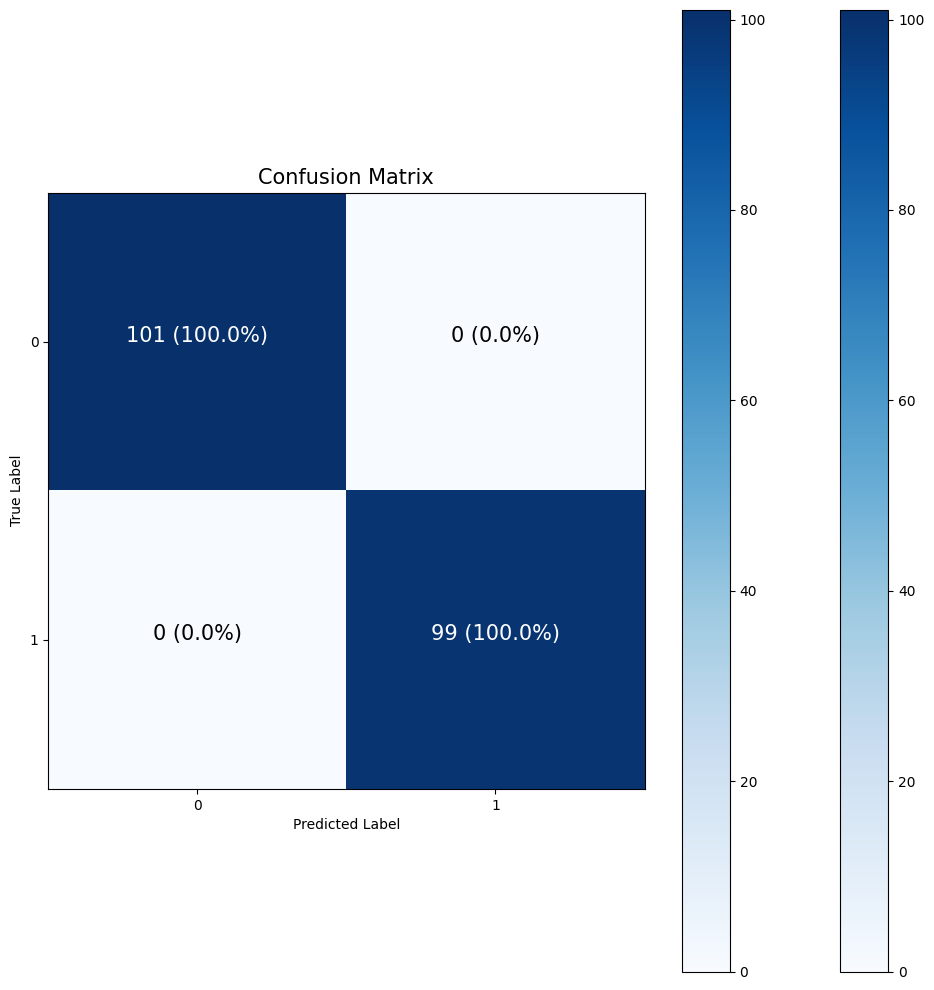

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (Multi-class Classification)

When you have more than two classes as an option, it's known as **multi-class classification**

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

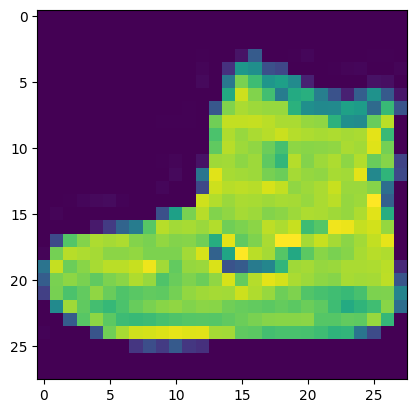

In [ ]:
# Plot the single sample
from matplotlib import pyplot as plt

plt.imshow(train_data[0])

In [ ]:
# Create a list so we can idex onto our trwaining labels so it becomes human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

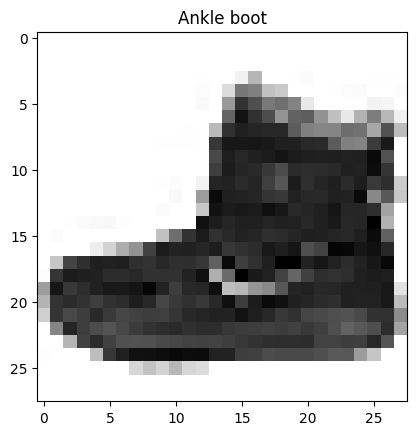

In [ ]:
# Plot an example image
index_of_choice = 0

plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

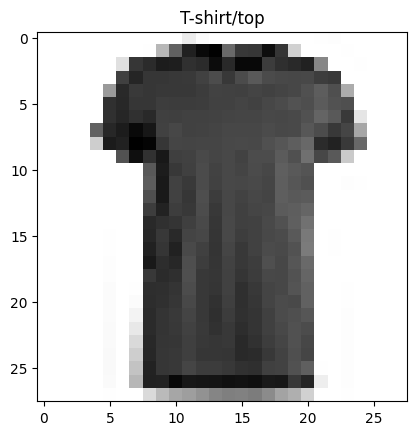

In [ ]:
def plot_image(image_choice_index):
    plt.imshow(train_data[image_choice_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[image_choice_index]])

plot_image(17)

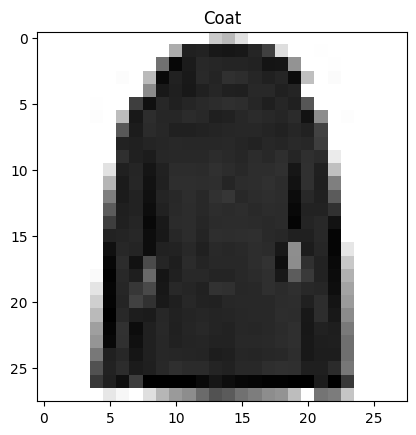

In [ ]:
plot_image(2000)

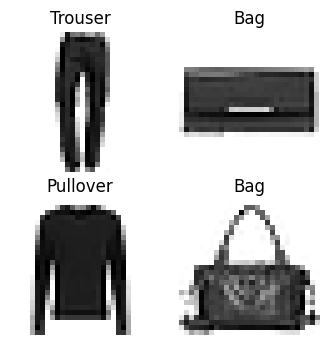

In [ ]:
# Plot multiple random images of Fashion MNIST

import random

plt.figure(figsize=(4, 4))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))

    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)



## Building a Multi-class Classification model

* Input shape = 28 x 28
* Output shape = 10
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activatio = Softmax()

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
import tensorflow as tf

In [ ]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set seed for reproducibility
tf.random.set_seed(42)

# Define the model
model_14 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax"),  # Assuming 10 classes for example
 ])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4362 - accuracy: 0.0984 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3034 - val_accuracy:

In [ ]:
model_14.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_92 (Dense)            (None, 4)                 3140      
                                                                 
 dense_93 (Dense)            (None, 4)                 20        
                                                                 
 dense_94 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Neural networks prefer data to be scaled (or normalized)

In [ ]:
train_data.min(), train_data.max()

(0, 255)

We can get our training and testing data between 0 and 1 by dividing by 255.

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check min and ax values
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_15 = model_15.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3670 - accuracy: 0.4975 - val_loss: 0.9437 - val_accuracy: 0.7124
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8264 - accuracy: 0.7349 - val_loss: 0.7883 - val_accuracy: 0.7443
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7301 - accuracy: 0.7504 - val_loss: 0.7375 - val_accuracy: 0.7314
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6902 - accuracy: 0.7578 - val_loss: 0.7075 - val_accuracy: 0.7491
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6694 - accuracy: 0.7625 - val_loss: 0.7067 - val_accuracy: 0.7589
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6519 - accuracy: 0.7658 - val_loss: 0.6890 - val_accuracy: 0.7624
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6362 - accuracy: 0.7717 - val_loss: 0.7196 - val_accuracy:

<Axes: >

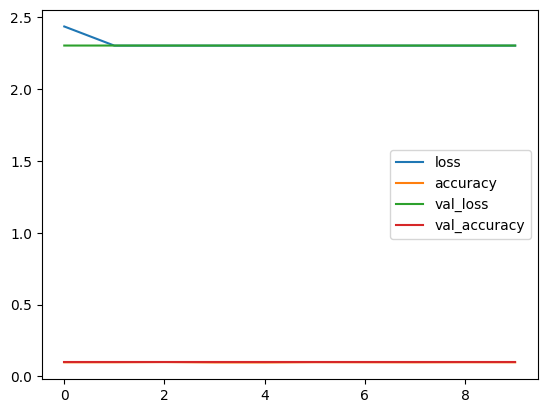

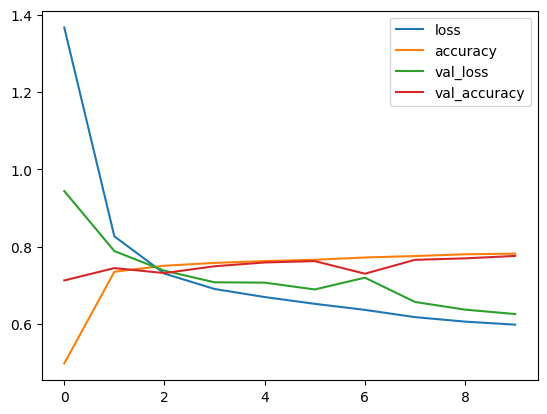

In [ ]:
import pandas as pd
pd.DataFrame(history_14.history).plot()
pd.DataFrame(history_15.history).plot()

## Finding the ideal Learning Rate

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_16 = model_16.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4619 - accuracy: 0.3842 - val_loss: 1.1200 - val_accuracy: 0.5495 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0246 - accuracy: 0.5748 - val_loss: 0.9841 - val_accuracy: 0.6121 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8555 - accuracy: 0.6798 - val_loss: 0.7852 - val_accuracy: 0.7209 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6890 - accuracy: 0.7543 - val_loss: 0.6711 - val_accuracy: 0.7612 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6360 - accuracy: 0.7704 - val_loss: 0.6498 - val_accuracy: 0.7713 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6172 - accuracy: 0.7778 - val_loss: 0.6597 - val_accuracy: 0.7690 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

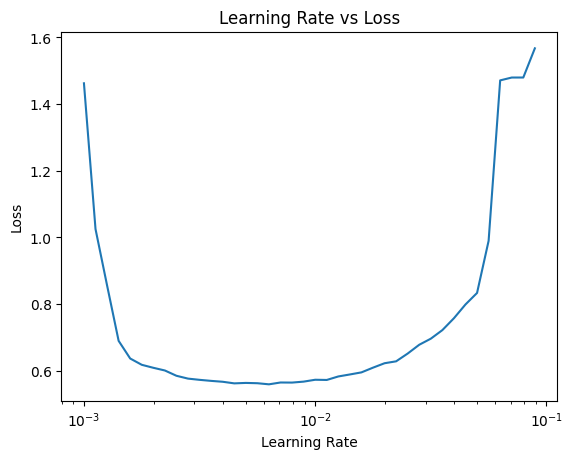

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, history_16.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

In [ ]:
# Let's refit a model with the ideal learning rate
tf.random.set_seed(42)

model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_17.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_17 = model_17.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2168 - accuracy: 0.5933 - val_loss: 0.9123 - val_accuracy: 0.6897
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8332 - accuracy: 0.7157 - val_loss: 0.7932 - val_accuracy: 0.7418
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7170 - accuracy: 0.7626 - val_loss: 0.7024 - val_accuracy: 0.7607
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6622 - accuracy: 0.7714 - val_loss: 0.6758 - val_accuracy: 0.7674
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6388 - accuracy: 0.7769 - val_loss: 0.6582 - val_accuracy: 0.7739
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6034 - accuracy: 0.7907 - val_loss: 0.6244 - val_accuracy: 0.7884
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5628 - accuracy: 0.8040 - val_loss: 0.6342 - val_accuracy:

### Evaluating the model

In [ ]:
# Create a confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    import itertools
    from sklearn.metrics import confusion_matrix

    figsize = (10, 10)

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    fig.colorbar(im)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Create title and axis labels
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)


    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Write the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black",
                size=15)

    # Plot the figure and make it pretty
    plt.title("Confusion Matrix", size=15)
    plt.tight_layout()
    plt.colorbar(im)

In [ ]:
# Create a confusion matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    import itertools
    from sklearn.metrics import confusion_matrix

    figsize = (10, 10)

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    fig.colorbar(im)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Create title and axis labels
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Write the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black",
                size=text_size)

    # Plot the figure and make it pretty
    plt.title("Confusion Matrix", size=15)
    plt.tight_layout()
    plt.colorbar(im)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions
y_probs = model_17.predict(test_data_norm)
y_probs[0]

313/313 [==============================] - 1s 2ms/step


array([2.32402875e-09, 1.55411153e-11, 1.41602896e-10, 4.84714846e-09,
       1.08756375e-07, 1.77297428e-01, 1.15311948e-07, 1.27298638e-01,
       1.20474340e-03, 6.94198966e-01], dtype=float32)

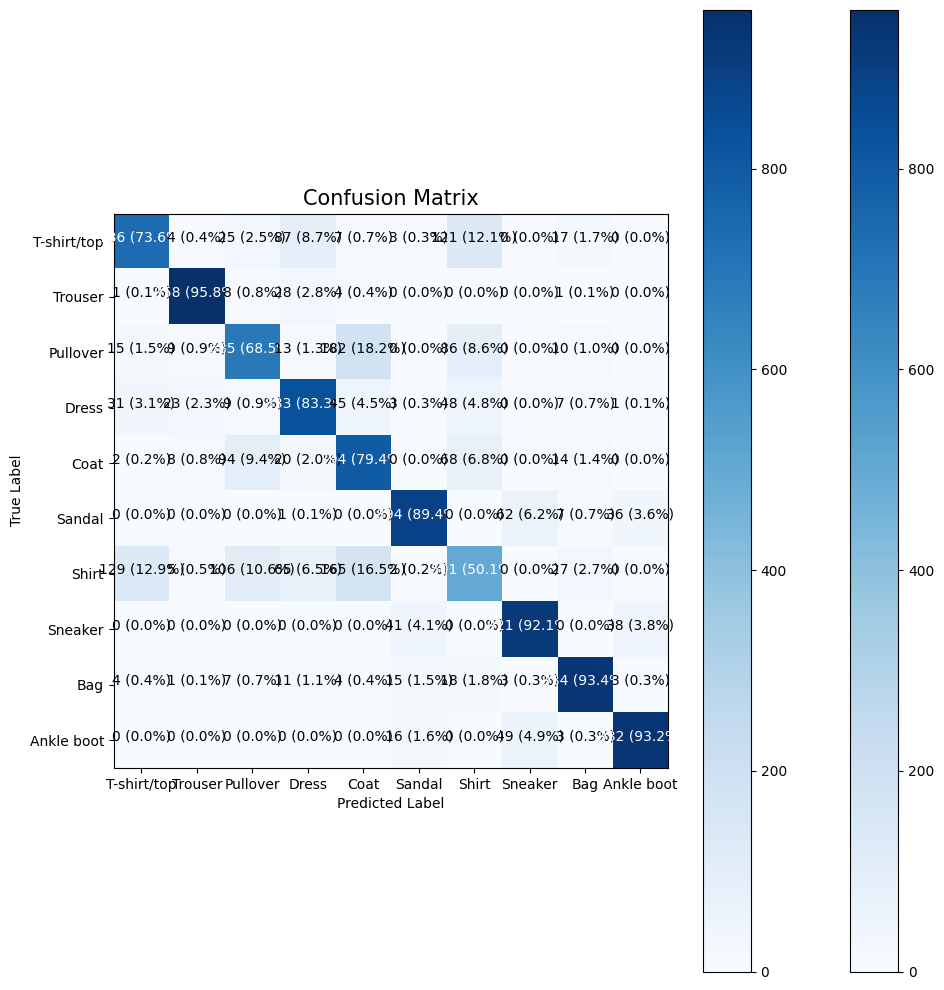

In [ ]:
# Make confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_probs.argmax(axis=1),
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                      y_pred=y_probs.argmax(axis=1))


array([[736,   4,  25,  87,   7,   3, 121,   0,  17,   0],
       [  1, 958,   8,  28,   4,   0,   0,   0,   1,   0],
       [ 15,   9, 685,  13, 182,   0,  86,   0,  10,   0],
       [ 31,  23,   9, 833,  45,   3,  48,   0,   7,   1],
       [  2,   8,  94,  20, 794,   0,  68,   0,  14,   0],
       [  0,   0,   0,   1,   0, 894,   0,  62,   7,  36],
       [129,   5, 106,  65, 165,   2, 501,   0,  27,   0],
       [  0,   0,   0,   0,   0,  41,   0, 921,   0,  38],
       [  4,   1,   7,  11,   4,  15,  18,   3, 934,   3],
       [  0,   0,   0,   0,   0,  16,   0,  49,   3, 932]])

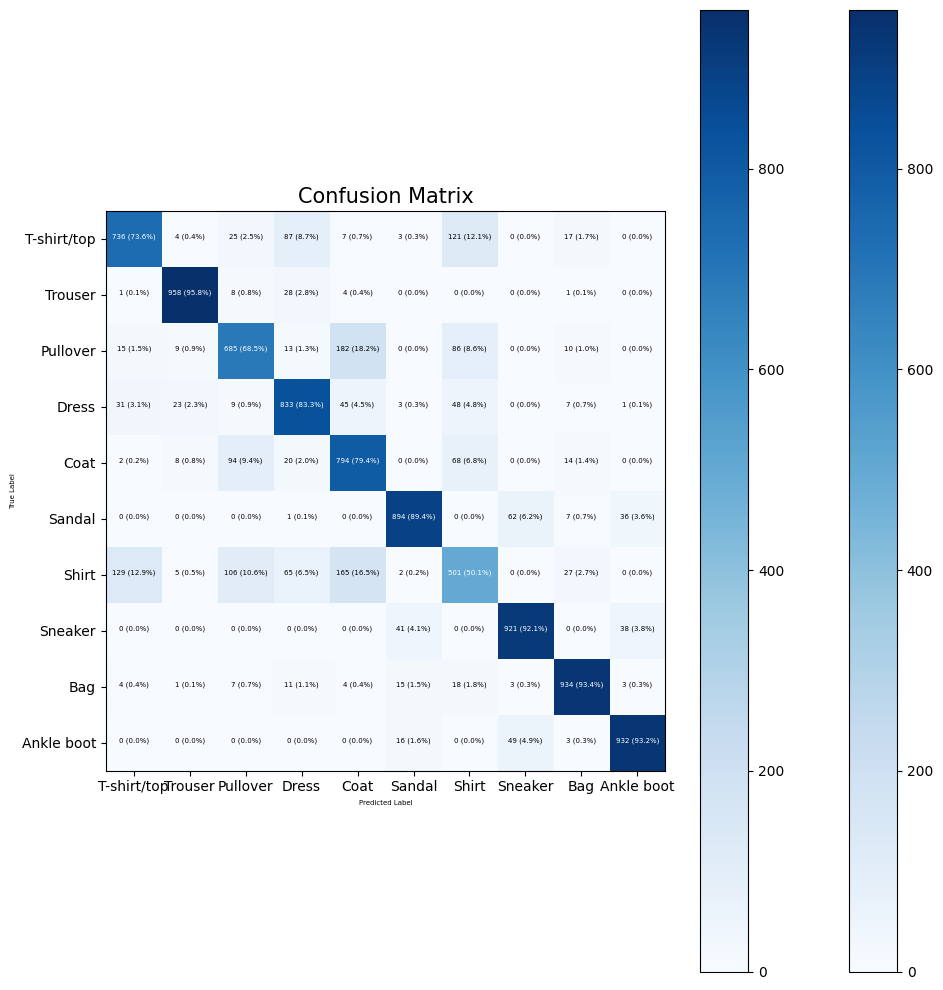

In [ ]:
# Make a prettier confusion matrix

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_probs.argmax(axis=1),
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=5)

1/1 [==============================] - 0s 24ms/step


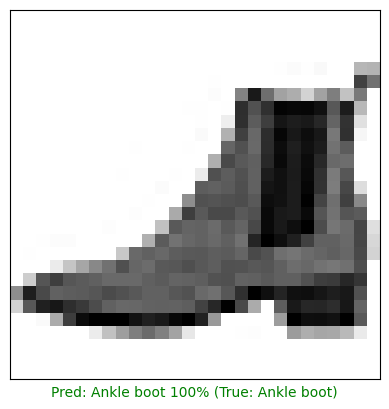

In [201]:
import random

def plot_random_image(model, images, true_labels, class_names):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Setup random integer
    i = random.randint(0, len(images) - 1)

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = class_names[pred_probs.argmax()]
    true_label = class_names[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                        true_label),
               color=color)
    plt.xticks([])
    plt.yticks([])
    plt.show()

plot_random_image(model_17, test_data_norm, test_labels, class_names)

In [202]:
# Find the layers of our most recent model
model_17.layers

In [203]:
model_17.layers[1]

In [204]:
# Get the patterns of our layer
weights, biases = model_17.layers[1].get_weights()

# Shapes
weights.shape, biases.shape

((784, 4), (4,))

In [205]:
model_17.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_101 (Dense)           (None, 4)                 3140      
                                                                 
 dense_102 (Dense)           (None, 4)                 20        
                                                                 
 dense_103 (Dense)           (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
biases, biases.shape

(array([1.6901261 , 1.0069352 , 0.16084102, 0.4158198 ], dtype=float32), (4,))

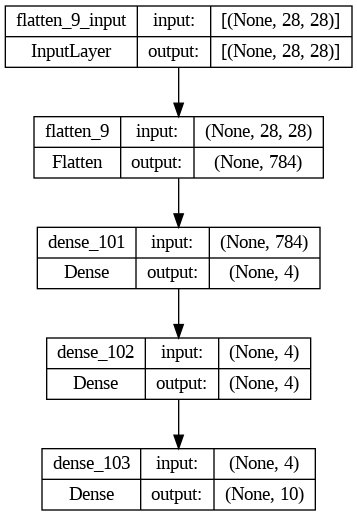

In [207]:
tf.keras.utils.plot_model(model_17, show_shapes=True)